<a href="https://colab.research.google.com/github/ohenriquesilvar/GCC_253/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Henrique Silva Rabelo

**Matricula**: 202010698

**Turma**: 10A, 14A

Link do repositório GitHub: 

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import time

global_1=0

## Demais Funções


### Função para gerar arranjos aleatórios

In [39]:
def gera_arranjos_aleatorio(n_elementos):
  A= np.random.randint(0, 100, n_elementos)
  return A

In [64]:
def tempo(algoritmo, arranjo):
  aux = 0
  ini= time.time()
  if(algoritmo == mergeSort):
    aux= algoritmo(arranjo, 0 , len(arranjo)-1)
  elif(algoritmo == quickSort):
    aux= algoritmo(0, len(arranjo)-1, arranjo)
  else:    
    aux=algoritmo(arranjo)
  fim = time.time()
  tempo_exec=fim-ini
  return aux, tempo_exec


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [3]:
def insertionSort(arranjo):
  ini= time.time()
  for j in range (1,len(arranjo)):
    chave=arranjo[j]
    i=j-1
    while i>=0 and arranjo[i]>chave:
      arranjo[i+1]=arranjo[i]
      i=i-1
    arranjo[i+1]=chave
  fim = time.time()
  tempo_exec=fim-ini
  return arranjo 

  #print('A[i..j-1] invariante de loop:', arranjo[:j])

##  Merge Sort


In [58]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    L = [0] * (n1)
    R = [0] * (n2)
 
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
 
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

 
def mergeSort(arr, l , r):
    if l < r:
 
        m = l+(r-l)//2
 
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)
    return arr    

##  Selection Sort


In [33]:
def selectionSort(array):
	length = len(array)

	for item in range(length):
		minimum = item

		for i in range(item + 1, length):
			if array[i] < array[minimum]:
				minimum = i

		(array[item], array[minimum]) = (array[minimum], array[item])
		
		return array

a = selectionSort(gera_arranjos_aleatorio(10))
a

array([ 9, 25, 35, 22, 66, 90, 76, 61, 22, 26])

##  Bubble Sort


In [79]:
def bubbleSort(array):
  size = len(array)
  for i in range(size -1):
    for j in range (size -1):
        if array[j] > array[j + 1]:
            array[j], array[j + 1] = array[j + 1], array[j]
            swapped = True
    if not swapped:
        break
  return array

## Heap Sort

In [85]:
def heapify(arr, n, i):
    largest = i 
    l = 2 * i + 1
    r = 2 * i + 2 
  
    if l < n and arr[largest] < arr[l]:
        largest = l
  
    if r < n and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i] 

        heapify(arr, n, largest)
  
def heapSort(arr):
    n = len(arr)
  
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
  
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

## Quick Sort



In [62]:
def partition(l, r, nums):
    pivot, ptr = nums[r], l
    for i in range(l, r):
        if nums[i] <= pivot:
            nums[i], nums[ptr] = nums[ptr], nums[i]
            ptr += 1

    nums[ptr], nums[r] = nums[r], nums[ptr]
    return ptr
 
def quickSort(l, r, nums):
    if len(nums) == 1:
        return nums
    if l < r:
        pi = partition(l, r, nums)
        quickSort(l, pi-1, nums)
        quickSort(pi+1, r, nums)
    return nums

## Main

In [129]:
Ab=np.arange(50)
Ab

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

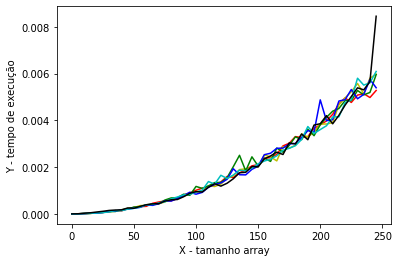

In [130]:
methods = [insertionSort, selectionSort, mergeSort, quickSort, bubbleSort, heapSort]
# methods = [insertionSort]
plot = []
for j in range(len(methods)):
  xArr = []
  yArr = []
  for i in range(len(Ab)):
    Array = gera_arranjos_aleatorio(5*i)
    ordena = tempo(insertionSort,Array)
    xArr.append(5*i) 
    yArr.append(ordena[1])
  plot.append([xArr, yArr])


plt.ylabel('Y - tempo de execução')
plt.xlabel('X - tamanho array')
plt.plot(plot[0][0], plot[0][1], color="r", label="Insertion")
plt.plot(plot[1][0], plot[1][1], color="y", label="Selection")
plt.plot(plot[2][0], plot[2][1], color="g", label="Merge")
plt.plot(plot[3][0], plot[3][1], color="b", label="Quick")
plt.plot(plot[4][0], plot[4][1], color="c", label="Bubble")
plt.plot(plot[5][0], plot[5][1], color="k", label="Heap")
plt.show()


# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.

